## Ordinary Differential Equation

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Ordinary differential Equation

Consider the differential equation:

$\large{\frac{dy(t)}{dt} = - ky(t)}$ 

with $ k =0.3$

In [11]:
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

In [12]:
# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

In [14]:
for it, iy in zip(t,y):
    print(it,iy)

0.0 [5.]
0.40816326530612246 [4.42375528]
0.8163265306122449 [3.91392204]
1.2244897959183674 [3.46284668]
1.6326530612244898 [3.06375722]
2.0408163265306123 [2.7106624]
2.4489795918367347 [2.3982614]
2.857142857142857 [2.12186437]
3.2653061224489797 [1.87732164]
3.673469387755102 [1.6609623]
4.081632653061225 [1.46953813]
4.4897959183673475 [1.30017539]
4.8979591836734695 [1.15033154]
5.3061224489795915 [1.01775702]
5.714285714285714 [0.90046157]
6.122448979591837 [0.79668431]
6.530612244897959 [0.70486726]
6.938775510204081 [0.62363203]
7.346938775510204 [0.55175909]
7.755102040816327 [0.48816942]
8.16326530612245 [0.4319084]
8.571428571428571 [0.3821314]
8.979591836734695 [0.33809115]
9.387755102040817 [0.29912649]
9.795918367346939 [0.26465247]
10.204081632653061 [0.23415155]
10.612244897959183 [0.20716582]
11.020408163265307 [0.18329018]
11.428571428571429 [0.16216617]
11.83673469387755 [0.14347669]
12.244897959183675 [0.12694116]
12.653061224489797 [0.11231132]
13.061224489795919 

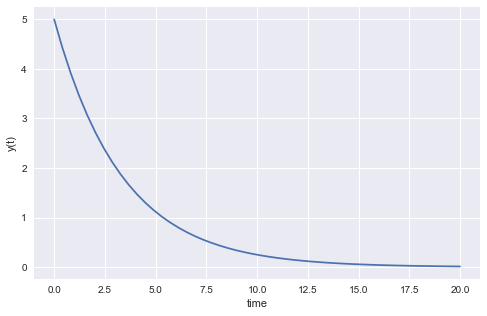

In [15]:
# plot results
plt.figure(figsize = [8,5])
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### Simultaneous differential equations

$\large{\frac{dy_1(t)}{dt} = - k_1y_1(t)}$ 

$\large{\frac{dy_2(t)}{dt} = k_2 \sin(t)}$ 

$\large{\frac{dy_3(t)}{dt} = k_3 \exp(-t)}$ 

In [4]:
# function that returns dy/dt
def model(y,t,k):
    dy1dt = -k[0] * y[0]
    dy2dt = k[1]*np.sin(t) 
    dy3dt =  k[2]*np.exp(-t) 
    dydt = [dy1dt,dy2dt,dy3dt]
    return dydt

In [5]:
# initial condition
y0 = [5,0,0]

# time points
t = np.linspace(0,20)

# solve 
k1 = 0.1
k2 = 2.0
k3 = 3.0
k =[k1,k2,k3]

'''solve ODEs'''
y = odeint(model,y0,t,args=(k,))


y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)

for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]

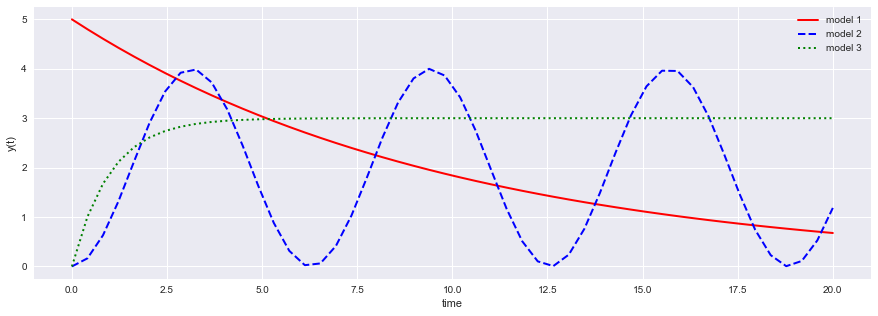

In [6]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,'r-',linewidth=2,label='y1')
plt.plot(t,y2,'b--',linewidth=2,label='y2')
plt.plot(t,y3,'g:',linewidth=2,label='y3')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Implementing  $tspan$ method

$\large{2\frac{dx(t)}{dt} = - x(t) + u(t)}$ 

$\large{5 \frac{dy(t)}{dt} = -y(t) +  x(t)}$ 

$u = 2S(t-5),~~ x(0) = 0,~~ y(0) =0$ 

In [7]:
# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

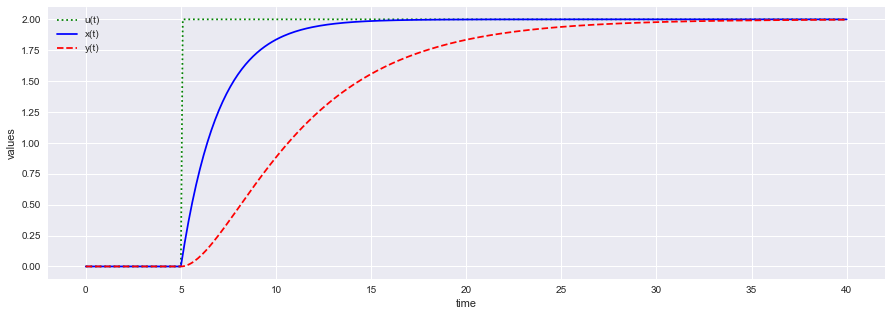

In [8]:
# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.figure(figsize = [15,5])
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()